In [49]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments'

std = '505'

df_man = pd.read_csv(folder+r'\Std_calibrations\Viscosity_std_'+std+'.csv')

df_exp2 = pd.read_csv(folder+r'\BOTorch_optimization\VS_code_csv\Viscosity_std_'+std+'_3_vol_opt_duplicate_unused.csv')

df_exp3 = pd.read_csv(folder+r'\BOTorch_optimization\VS_code_csv\Viscosity_std_'+std+'_exp3_withacq.csv')

In [50]:
df_exp2['Iteration']= None
counter =1 
for i in range(0,len(df_exp2),3):
    df_exp2.loc[i:i+3,'iteration']=counter
    counter+=1
"""for i in range(len(df_exp2)-5,len(df_exp2)):
    df_exp2.loc[i:i+3,'iteration']=counter-1
    counter+=1"""
df_exp2

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,Iteration,iteration
0,Viscosity_std_505,p1000,1000,49.507284,49.507284,0,5,5,0,-7.382241,50.398096,NaN,None,1.0
1,Viscosity_std_505,p1000,500,49.507284,49.507284,0,5,5,0,-8.280548,50.398096,NaN,None,1.0
2,Viscosity_std_505,p1000,300,49.507284,49.507284,0,5,5,0,-8.556950,50.398096,NaN,None,1.0
3,Viscosity_std_505,p1000,1000,61.884105,4.950728,0,5,5,0,-0.345503,228.149719,NaN,None,2.0
4,Viscosity_std_505,p1000,500,61.884105,4.950728,0,5,5,0,-2.360935,228.149719,NaN,None,2.0
5,Viscosity_std_505,p1000,300,61.884105,4.950728,0,5,5,0,-2.760183,228.149719,NaN,None,2.0
6,Viscosity_std_505,p1000,1000,4.950728,4.950728,0,5,5,0,2.810089,413.980961,NaN,None,3.0
7,Viscosity_std_505,p1000,500,4.950728,4.950728,0,5,5,0,8.372682,413.980961,NaN,None,3.0
8,Viscosity_std_505,p1000,300,4.950728,4.950728,0,5,5,0,15.167569,413.980961,NaN,None,3.0
9,Viscosity_std_505,p1000,1000,4.950728,61.884105,0,5,5,0,-7.382241,228.149719,NaN,None,4.0


In [51]:
df_exp3['iteration']= None
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=counter
    counter+=1
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

df_exp3

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
0,Viscosity_std_505,p1000,1000,49.507284,49.507284,0,5,5,0,-7.382241,50.398096,NaN,1
1,Viscosity_std_505,p1000,500,49.507284,49.507284,0,5,5,0,-8.280548,50.398096,NaN,1
2,Viscosity_std_505,p1000,300,49.507284,49.507284,0,5,5,0,-8.556950,50.398096,NaN,1
3,Viscosity_std_505,p1000,"mean[300, 500, 1000]",49.507284,49.507284,0,5,5,0,-8.073247,50.398096,NaN,1
4,Viscosity_std_505,p1000,1000,61.884105,4.950728,0,5,5,0,-0.345503,228.149719,NaN,2
5,Viscosity_std_505,p1000,500,61.884105,4.950728,0,5,5,0,-2.360935,228.149719,NaN,2
6,Viscosity_std_505,p1000,300,61.884105,4.950728,0,5,5,0,-2.760183,228.149719,NaN,2
7,Viscosity_std_505,p1000,"mean[300, 500, 1000]",61.884105,4.950728,0,5,5,0,-1.822207,228.149719,NaN,2
8,Viscosity_std_505,p1000,1000,4.950728,4.950728,0,5,5,0,2.810089,413.980961,NaN,3
9,Viscosity_std_505,p1000,500,4.950728,4.950728,0,5,5,0,8.372682,413.980961,NaN,3


In [52]:
df_man=df_man.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
df_man['time_for_1000']=0
for i in range(len(df_man)):
    if (df_man['blow_out_rate'].iloc[i])<=0:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
    else:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + 150/df_man["blow_out_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
df_man.reset_index(drop=True)

df_man['iteration']= None
counter= 1
for row in df_man.drop_duplicates(["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]).iterrows():
    df_repeat = df_man.loc[:,["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]== row[1].loc[["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]
    index = df_repeat.where(df_repeat.sum(axis=1)==8).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1
df_man = df_man.sort_values('iteration')
df_man

C:\Users\Shivam\AppData\Local\Temp\ipykernel_24616\3527151536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]


,liquid,Viscosity 10 s-1,Viscosity 100 s-1,Viscosity 900 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000,iteration
0,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,0,0.0,0.0,0,True,False,52.402341,-18.657146,0.7063,0.86830,46.511628,1
1,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,40.0,40,0,0.0,0.0,0,True,False,56.356964,-17.643672,0.7151,0.86830,50.000000,2
2,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,5.0,5.0,0,True,False,89.094670,2.487619,0.8899,0.86830,86.511628,3
3,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,2.0,2.0,0,True,False,83.891726,-2.314868,0.8482,0.86830,80.511628,4
13,Viscosity_std_505.4,505.4,505.4,505.4,p1000,500,43.0,43,5,2.0,2.0,0,True,False,60.531376,-8.994587,0.3951,0.43415,80.511628,4
4,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,0.0,0.0,0,True,False,79.937716,-7.094322,0.8067,0.86830,76.511628,5
5,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,3.5,3.5,0,True,False,86.962497,0.518254,0.8728,0.86830,83.511628,6
10,Viscosity_std_505.4,505.4,505.4,505.4,p1000,500,43.0,43,5,3.5,3.5,0,True,False,63.738007,7.497409,0.4667,0.43415,83.511628,6
7,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,2.5,2.5,0,True,False,84.311817,0.564321,0.8732,0.86830,81.511628,7
11,Viscosity_std_505.4,505.4,505.4,505.4,p1000,500,43.0,43,5,2.5,2.5,0,True,False,61.827380,7.727744,0.4677,0.43415,81.511628,7


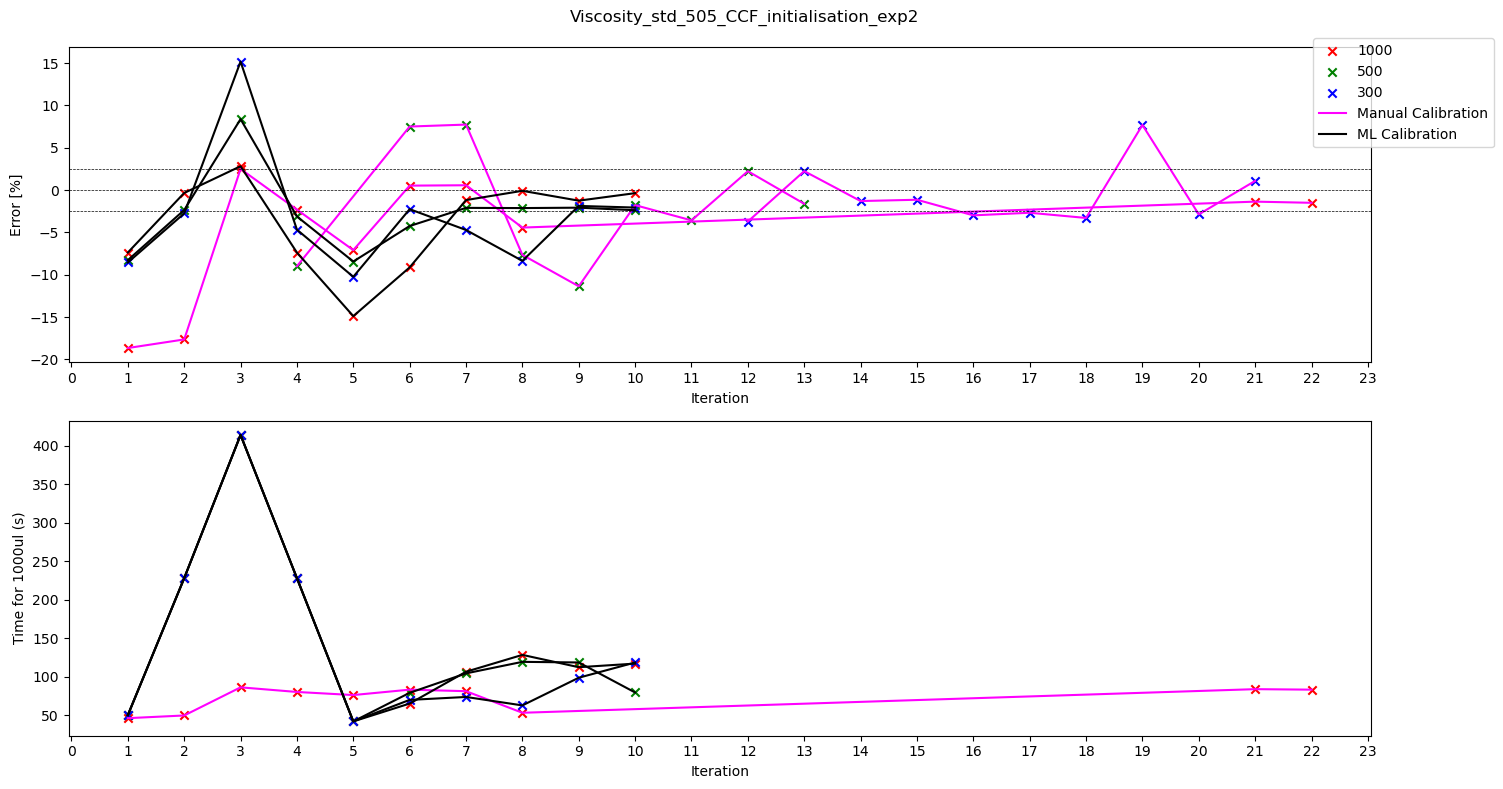

In [55]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

df_exp2_1000 = df_exp2.where(df_exp2.volume==1000).dropna(how='all')
df_exp2_500 = df_exp2.where(df_exp2.volume==500).dropna(how='all')
df_exp2_300 = df_exp2.where(df_exp2.volume==300).dropna(how='all')
df_exp2_100 = df_exp2.where(df_exp2.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], c = 'magenta')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

if len(df_exp2_1000) != 0:
    axs[0].scatter(df_exp2_1000['iteration'],df_exp2_1000['%error'], marker= 'x', c = 'red')
    axs[0].plot(df_exp2_1000['iteration'],df_exp2_1000['%error'], label = 'ML Calibration', c = 'black')
if len(df_exp2_500) != 0:
    axs[0].scatter(df_exp2_500['iteration'],df_exp2_500['%error'], marker= 'x', c = 'green')
    axs[0].plot(df_exp2_500['iteration'],df_exp2_500['%error'], c = 'black')
if len(df_exp2_300) != 0:
    axs[0].scatter(df_exp2_300['iteration'],df_exp2_300['%error'], marker= 'x', c = 'blue')
    axs[0].plot(df_exp2_300['iteration'],df_exp2_300['%error'], c = 'black')
if len(df_exp2_100) != 0:
    axs[0].scatter(df_exp2_100['iteration'],df_exp2_100['%error'], marker= 'x', c = 'grey')
    axs[0].plot(df_exp2_100['iteration'],df_exp2_100['%error'], c = 'black')


axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

if len(df_man_1000) != 0:
    axs[1].scatter(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
    axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], c = 'magenta')


if len(df_exp2_1000) != 0:
    axs[1].scatter(df_exp2_1000['iteration'],df_exp2_1000['time_asp_1000'], marker= 'x', c = 'red')
    axs[1].plot(df_exp2_1000['iteration'],df_exp2_1000['time_asp_1000'], label = 'ML Calibration', c = 'black')
if len(df_exp2_500) != 0:
    axs[1].scatter(df_exp2_500['iteration'],df_exp2_500['time_asp_1000'], marker= 'x', c = 'green')
    axs[1].plot(df_exp2_500['iteration'],df_exp2_500['time_asp_1000'], c = 'black')
if len(df_exp2_300) != 0:
    axs[1].scatter(df_exp2_300['iteration'],df_exp2_300['time_asp_1000'], marker= 'x', c = 'blue')
    axs[1].plot(df_exp2_300['iteration'],df_exp2_300['time_asp_1000'], c = 'black')
if len(df_exp2_100) != 0:
    axs[1].scatter(df_exp2_100['iteration'],df_exp2_100['time_asp_1000'], marker= 'x', c = 'grey')
    axs[1].plot(df_exp2_100['iteration'],df_exp2_100['time_asp_1000'], c = 'black')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'CCF_initialisation_exp2')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder = folder = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\Shivam_Report")
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp2_updated_line.png')


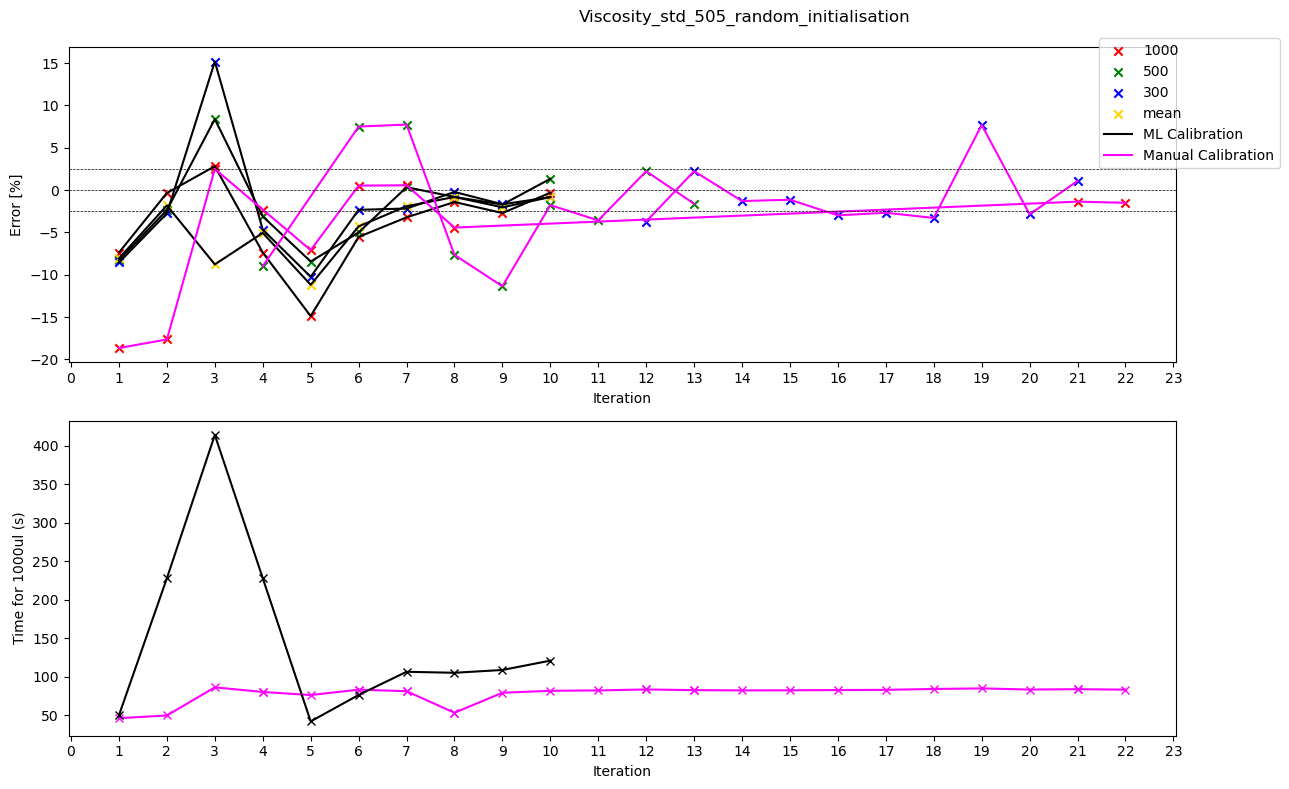

In [56]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')


# Plotting graph 1: Iteration against error
if len(df_exp3_1000) != 0:
    axs[0].scatter(df_exp3_1000['iteration'],df_exp3_1000['%error'], label = '1000', marker= 'x', c = 'red')
    axs[0].plot(df_exp3_1000['iteration'],df_exp3_1000['%error'], c = 'black')
if len(df_exp3_500) != 0:
    axs[0].scatter(df_exp3_500['iteration'],df_exp3_500['%error'], label = '500', marker= 'x', c = 'green')
    axs[0].plot(df_exp3_500['iteration'],df_exp3_500['%error'], c = 'black')
if len(df_exp3_300) != 0:
    axs[0].scatter(df_exp3_300['iteration'],df_exp3_300['%error'], label = '300', marker= 'x', c = 'blue')
    axs[0].plot(df_exp3_300['iteration'],df_exp3_300['%error'], c = 'black')
if len(df_exp3_100) != 0:
    axs[0].scatter(df_exp3_100['iteration'],df_exp3_100['%error'], label = '100', marker= 'x', c = 'grey')
    axs[0].plot(df_exp3_100['iteration'],df_exp3_100['%error'], c = 'black')
if len(df_exp3_mean) != 0:
    axs[0].scatter(df_exp3_mean['iteration'],df_exp3_mean['%error'], marker= 'x', c = 'gold', label='mean')
    axs[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'], label = 'ML Calibration', c = 'black')
    
    
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', c = 'red')
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], c = 'magenta')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', c = 'green')
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', c = 'blue')
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', c = 'grey')
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')




axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_man['iteration'],df_man['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')
axs[1].plot(df_exp3_1000['iteration'],df_exp3_1000['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder = folder = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\Shivam_Report")
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp3_updated_line.png')


In [71]:
df_exp3_mean

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
3,Viscosity_std_505,p1000,"mean[300, 500, 1000]",49.507284,49.507284,0.0,5.0,5.0,0.0,-8.073247,50.398096,NaN,1
7,Viscosity_std_505,p1000,"mean[300, 500, 1000]",61.884105,4.950728,0.0,5.0,5.0,0.0,-1.822207,228.149719,NaN,2
11,Viscosity_std_505,p1000,"mean[300, 500, 1000]",4.950728,4.950728,0.0,5.0,5.0,0.0,-8.783447,413.980961,NaN,3
15,Viscosity_std_505,p1000,"mean[300, 500, 1000]",4.950728,61.884105,0.0,5.0,5.0,0.0,-5.060975,228.149719,NaN,4
19,Viscosity_std_505,p1000,"mean[300, 500, 1000]",61.884105,61.884105,0.0,5.0,5.0,0.0,-11.193008,42.318477,NaN,5
23,Viscosity_std_505,p1000,"mean[300, 500, 1000]",54.631917,20.707392,0.0,5.0,5.0,0.0,-4.295750,76.596252,26.207491,6
27,Viscosity_std_505,p1000,"mean[300, 500, 1000]",45.272971,13.405824,0.0,5.0,5.0,0.0,-1.914341,106.682682,19.120842,7
31,Viscosity_std_505,p1000,"mean[300, 500, 1000]",51.774776,13.141273,0.0,5.0,5.0,0.0,-0.820249,105.410553,27.246826,8
35,Viscosity_std_505,p1000,"mean[300, 500, 1000]",57.954057,12.227472,0.0,5.0,5.0,0.0,-2.039746,109.038101,21.125670,9
39,Viscosity_std_505,p1000,"mean[300, 500, 1000]",44.364301,11.284247,0.0,5.0,5.0,0.0,-0.829206,121.159760,23.276871,10


In [70]:
df_man_1000

,liquid,Viscosity 10 s-1,Viscosity 100 s-1,Viscosity 900 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000,iteration
0,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,0.0,0.0,0.0,0.0,True,False,52.402341,-18.657146,0.7063,0.8683,46.511628,1
1,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,40.0,40.0,0.0,0.0,0.0,0.0,True,False,56.356964,-17.643672,0.7151,0.8683,50.000000,2
2,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,5.0,5.0,5.0,0.0,True,False,89.094670,2.487619,0.8899,0.8683,86.511628,3
3,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,5.0,2.0,2.0,0.0,True,False,83.891726,-2.314868,0.8482,0.8683,80.511628,4
4,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,5.0,0.0,0.0,0.0,True,False,79.937716,-7.094322,0.8067,0.8683,76.511628,5
5,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,5.0,3.5,3.5,0.0,True,False,86.962497,0.518254,0.8728,0.8683,83.511628,6
7,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,5.0,2.5,2.5,0.0,True,False,84.311817,0.564321,0.8732,0.8683,81.511628,7
8,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,0.0,3.5,3.5,0.0,True,False,59.809127,-4.433951,0.8298,0.8683,53.511628,8
38,Viscosity_std_check,505.4,505.4,505.4,p1000,1000.0,41.0,43.0,5.0,4.0,2.5,0.0,True,False,87.723042,-1.370494,0.8564,0.8683,84.146058,21
37,Viscosity_std_check,505.4,505.4,505.4,p1000,1000.0,43.0,43.0,5.0,4.0,3.0,0.0,True,False,86.719813,-1.508695,0.8552,0.8683,83.511628,22
